# 泰塔尼克号乘客数据分析

## 提出问题 
1）在891名乘客中，男乘客多少人？女乘客多少人？男乘客生还多少人，占男乘客的比例？女乘客生还多少人，占女乘客的比例？
2）男女各年龄段的生存比例？儿童的生存比例是否更高?
3）乘客等级因素是否影响生存比例？

## 清洗数据
对数据进行清洗，如果没有数据赋予值“None”

In [193]:
import unicodecsv
import csv
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [194]:
#从CSV文件中读取数据
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
passengers = read_csv('titanic_data.csv')
passengers[0]

{u'Age': u'22',
 u'Cabin': u'',
 u'Embarked': u'S',
 u'Fare': u'7.25',
 u'Name': u'Braund, Mr. Owen Harris',
 u'Parch': u'0',
 u'PassengerId': u'1',
 u'Pclass': u'3',
 u'Sex': u'male',
 u'SibSp': u'1',
 u'Survived': u'0',
 u'Ticket': u'A/5 21171'}

In [195]:
#对数字进行清洗，没有值则返回“None”
def parse_maybe_float(i):
    if i == '':
        return None
    else:
        return float(i)
    
#对字符串进行清洗，没有值则返回“None”    
def parse_str(s):
    if s == '':
        return None
    else:
        return s
    
for passenger in passengers:
    passenger['Age'] = parse_maybe_float(passenger['Age'])
    passenger['Fare'] = parse_maybe_float(passenger['Fare'])
    passenger['Parch'] = int(float(passenger['Parch']))
    passenger['SibSp'] = int(float(passenger['SibSp']))
    passenger['Pclass'] = int(float(passenger['Pclass']))
    passenger['Survived'] = int(float(passenger['Survived']))
    passenger['Cabin'] = parse_str(passenger['Cabin'])

passengers[0]    

{u'Age': 22.0,
 u'Cabin': None,
 u'Embarked': u'S',
 u'Fare': 7.25,
 u'Name': u'Braund, Mr. Owen Harris',
 u'Parch': 0,
 u'PassengerId': u'1',
 u'Pclass': 3,
 u'Sex': u'male',
 u'SibSp': 1,
 u'Survived': 0,
 u'Ticket': u'A/5 21171'}

In [196]:
#把清洗的数据存储为dataframe，方便分析
data = pd.DataFrame(passengers)

In [197]:
display(data.head())

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,None,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,None,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,None,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [198]:
#查看数据缺失情况
data.isnull().sum()

Age            177
Cabin          687
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
dtype: int64

由于对数据清洗时，缺失的值赋予的是“None”，所以isnull()函数仍然返回了“None”的数量。
年龄“Age”数据缺失了177个，在分析年龄因素的时候我们可以方便的使用判断语句排除年龄为“None”的人；
房间号“Cabin”缺失了687个，但它不是我们关注的重点。
其他数据完整，可以进行分析了。

## 调查数据
统计男人和女人的数量，以及男女的生还者比例。

In [199]:
#统计数据中的总人数
len(data.index)

891

In [200]:
#统计男性和女性各多少人
sex_num = data.groupby('Sex').size()
sex_num

Sex
female    314
male      577
dtype: int64

In [201]:
#统计男女各生还多少人
sex_survived_num =data.groupby('Sex').sum()['Survived']
sex_survived_num

Sex
female    233
male      109
Name: Survived, dtype: int64

In [202]:
#计算男女各自的生还比例
sex_survived_num/sex_num

Sex
female    0.742038
male      0.188908
dtype: float64

作图观察上述数据

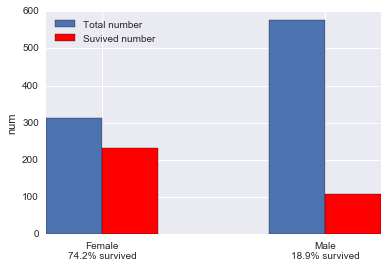

In [203]:
plt.ylabel('num')
plt.xticks((0,1),('Female\n74.2% survived','Male\n18.9% survived'))
total_num = plt.bar((-0.125,0.875),sex_num,width = 0.25,align= 'center')
survived_num = plt.bar((0,1),sex_survived_num,width = 0.25,color ='red')
plt.legend([total_num,survived_num],['Total number','Suvived number'],loc = 'upper left')

从以上分析中可以得到891名乘客中，男性577人，生还109人，生还比例为18.9%；女性233人，生还233人，生还比例为74.2%，下面分别计算男女乘客各年龄段的生存比例。

In [204]:
#给出年龄段的跨度，按等差数列给出年龄段的数组
def age_list(n):
    age = [0]
    i = 0
    while i < 80:
        i = i + n
        age.append(i)
    return age
#年龄段的跨度为5
age_level=age_list(5)
age_level

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]

In [205]:
#判断给定年龄在哪个年龄段的程序
def index_age_stage(age,age_level):
    i = 0
    for age_element in age_level[1:]:
        if age < age_element:
            break
        else:
            i = i+1
    return i

In [206]:
#此程序统计乘客的年龄分布和各年龄段的生还人数（参数中考虑性别的因素）。
def survived_ratio(sex,age_level):
    n = len(age_level)
    survive = [0]*n
    total = [0]*n
    for passenger in passengers:
        if passenger['Sex'] == sex and passenger['Age'] > 0:
            i =index_age_stage(passenger['Age'],age_level)
            total[i] = total[i] + 1
            if passenger['Survived'] == 1:
                survive[i] = survive[i] + 1.
#                 print survive[i]
            
    return np.array(survive)/np.array(total)

In [207]:
# 男性各年龄段的生还比例
male_survived_ratio = survived_ratio('male',age_level)
male_survived_ratio

array([ 0.65217391,  0.44444444,  0.28571429,  0.1       ,  0.09722222,
        0.23684211,  0.20967742,  0.22222222,  0.16666667,  0.25925926,
        0.15      ,  0.1       ,  0.18181818,  0.        ,  0.        ,
               nan,  1.        ])

<Container object of 17 artists>

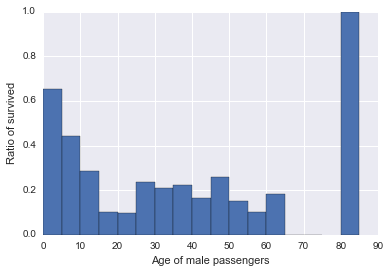

In [208]:
plt.xlabel("Age of male passengers")
plt.ylabel('Ratio of survived')
plt.bar(age_level,male_survived_ratio,width = 5)

In [209]:
# 女性各年龄段的生还比例
female_survived_ratio = survived_ratio('female',age_level)
female_survived_ratio

array([ 0.70588235,  0.53846154,  0.55555556,  0.80555556,  0.76190476,
        0.66666667,  0.81818182,  0.85185185,  0.72222222,  0.64285714,
        0.91666667,  0.83333333,  1.        ,         nan,         nan,
               nan,         nan])

<Container object of 17 artists>

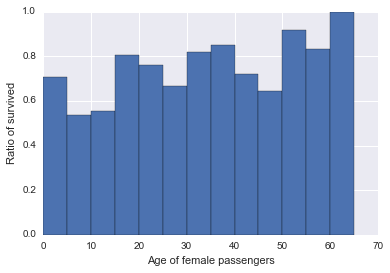

In [210]:
plt.xlabel("Age of female passengers")
plt.ylabel('Ratio of survived')
plt.bar(age_level,female_survived_ratio,width = 5)

根据上面两图可知，男性15岁以下乘客，生存比例比15岁以上（含15岁）要高得多，15~25岁的男性的生存比例只有10%左右。80以上男性乘客只有1人，并且生还了，此数据不具有代表性。说明儿童在逃生过程中受到了保护优先上了救生艇。
女性成员各年龄段的生存比例都大于50%，说明女性乘客优先上了救生艇。
下面,调查乘客等级的因素是否影响生还比例。

In [211]:
#该程序可以统计各等级乘客总人数、各等级男女比例，各等级男女各自的生存比例
def sex_num_Pclass(class_type):
    class_num = 0
    male_num = 0
    female_num = 0
    male_survived_num = 0
    female_survived_num = 0
    for passenger in passengers:
        if passenger['Pclass'] == class_type:
            class_num = class_num +1
            if passenger['Sex'] == 'male':
                male_num = male_num +1
                if passenger['Survived'] ==1:
                    male_survived_num = male_survived_num + 1
            else:
                female_num = female_num +1
                if passenger['Survived'] ==1:
                    female_survived_num = female_survived_num + 1
    return class_num,male_num,female_num,float(male_num)/female_num,\
           male_survived_num,float(male_survived_num)/male_num,female_survived_num,float(female_survived_num)/female_num    

In [212]:
#列出表格
pd.DataFrame([sex_num_Pclass(1),sex_num_Pclass(2),sex_num_Pclass(3)],index= ['class1','class2','class3'],\
             columns=['total_num','total_male_num','total_female_num','total_ratio','male_survived_num',\
                      'survived ratio of male','female_survived_num','survived ratio of female'] )

,total_num,total_male_num,total_female_num,total_ratio,male_survived_num,survived ratio of male,female_survived_num,survived ratio of female
class1,216,122,94,1.297872,45,0.368852,91,0.968085
class2,184,108,76,1.421053,17,0.157407,70,0.921053
class3,491,347,144,2.409722,47,0.135447,72,0.500000


通过上表，我们发现一等舱的男女比例为1.3：1，二等舱的男女比例为1.42：1，三等舱的男女比例为2.41：1，显然三等舱的男性成员更多，从而拉低了三等舱的生还比例，但是值得注意的是，一等舱的男性生还比例达到36.9%，远高于三等舱的生还比例13.54%；一等舱和二等舱的女性生还比例高于90%，但是三等舱的女性生还比例只有50%。显然，在各自等级下，女性生还比例远大于男性；另外，乘客等级越高，生还概率越大。高等级乘客生还比例高的原因有两种可能性，一种是高等级乘客的客房离甲板近，可以迅速聚集在救生艇周围从而优先上救生艇，低等级乘客在船的底部，船体沉没时会更危险；另一种解释是，负责指挥的船员优先安排高等级的乘客上救生艇。根据资料记载，在泰塔尼克号完全沉没前，还有两艘救生艇没有落下，显然是时间不够用，可能部分等待上船的低等级的女性乘客没有来得及上船。

## 结论
根据上述分析，我们发现性别和年龄因素是影响乘客生存的关键因素，女性或者儿童的生存比例要远高于成年男性。另外，乘客等级越高，生存比例也越高，但即使是一等舱的男性乘客，生存比例也只有36.9%，低于三等舱的女星生存比例50%。说明性别是影响生存的关键因素。
遗憾的是并没有得到全部乘客的资料，而且部分资料也缺失了，实际的男女各自的生存比例可能低于上述统计结果，这是因为生还者的资料更容易收集。